# **Decoding Global University Success: The Impact of Country and Research Excellence on Performance of an Institution**

Group No.13
Group member: Alina Hameed, Jessie Zhao, Ritisha Jhamb, Shanmei Liu

## **1. Introduction:**


In an increasingly globalized world, universities compete on multiple fronts to secure their position in the upper ranks of academia. Among the many factors contributing to a university’s overall performance, the geographical context and the strength of its research output are often considered pivotal. Numerous research studies have attempted to identify which factors most significantly influence a university's overall score. For instance, the study Predicting Global Ranking of Universities Across the World Using Machine Learning Regression Technique emphasizes the importance of analyzing various teaching and learning parameters through digital transformation, particularly leveraging machine learning algorithms to predict global university rankings (Madha et al. 4). This Specific study uses academic peer review, faculty to student ration, citations per faculty, employer reputation, international student ratio, and international staff ratio as indicators for ranking.
This research aims to decode the relationship between two critical elements: country and research score, and their impact on the overall performance of universities. The database used for this research is from "The World University Rankings 2023" dataset (from Kaggle https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023). It includes 1,799 universities across 104 countries and regions, making them the largest and most diverse university rankings.

This dataset contains information about various universities and their rankings based on different criteria. It includes the following 13 features, from Kaggle (see Appendix 1). In this study, we will be focusing on :

- 1)`Location` - the country of the university

- 2)`OverAll Score` - overall score of the university out of 100

- 3)`Research Score` - research score out of 100

This project investigates how these factors contribute to a university's global standing. Specifically, we will explore two key questions: **(1) How does research strength influence a university’s overall score?** and **(2) What role does location play in shaping a university’s global reputation?**

To address these questions, we will utilize a dataset that includes university overall scores, research output metrics, and geographical information. By analyzing this data, we aim to provide actionable recommendations for universities seeking to improve their global rankings through a strategic focus on research output and geographical advantages. This study aligns with existing literature by providing actionable insights into the drivers of academic excellence and institutional reputation, thus offering valuable recommendations for universities looking to enhance their performance in a competitive global environment (Wut et. al).

## **2. Methods and Results:**
### a. Exploratory Data Analysis (EDA)

### Clean and Wrangle

In [1]:
# Main developer: Shanmei Liu
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(modelr)
library(dplyr)
library(rsample)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘modelr’


The following object is masked from ‘package:broom’:

    bootstrap




In [2]:
# Main developer: Shanmei Liu
university_ranking_2023 <- read.csv("data/World University Rankings 2023.csv")
head(university_ranking_2023)
cat("Table 1: The raw dataset of University ranking")

Warning message in file(file, "rt"):
“cannot open file 'data/World University Rankings 2023.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


Based on the research objective of **analyzing the influence of `Location` and `Research Score` on the `Overall Score` in university rankings**, these variables were identified as covariates and the response variable, respectively. This process included the removal of invalid entries and missing data, as well as the conversion of `Overall Score` and `Research Score` to a numeric format for consistency and ease of analysis. Finally, the initial data rows were examined to verify the correctness of the data classification steps.

In [3]:
# Main developer: Shanmei Liu
clean_university <- university_ranking_2023|>
select(Location, OverAll.Score, Research.Score)|>
mutate(OverAll.Score = as.numeric(OverAll.Score),
      Research.Score = as.numeric(Research.Score))|>
drop_na(OverAll.Score,Research.Score,Location)

head(clean_university)
cat("Table 2: Clean data of University Ranking")

ERROR: Error in select(university_ranking_2023, Location, OverAll.Score, Research.Score): object 'university_ranking_2023' not found


To concentrate the analysis on countries with a substantial representation in the university rankings, the number of universities per location was calculated. The dataset was then filtered to include only the top three countries—**the United States, Germany, and the United Kingdom**—each having a significant number of universities represented. This approach was intended to provide a robust and focused analysis of these specific regions.

The second-ranked location is blank because some universities do not have `location` information due to certain political factors, so these universities will be considered blank rows and ignored.

In [5]:
# Main developer: Shanmei Liu
location_choice <- clean_university|>
count(Location)|>
arrange(desc(n))

head(location_choice,5)
cat("Table 3: The count of University group by Location")

,Location,n
,<chr>,<int>
1,United States,57
2,,48
3,Germany,19
4,United Kingdom,19
5,Australia,6


Table 3: The count of University group by Location

The resulting dataset showed that these three locations collectively included a sufficient number of observations (n = 95), which is critical for ensuring the reliability of statistical analyses. By narrowing the scope to these countries, the study could more precisely evaluate the factors influencing university rankings in these regions. 

In [6]:
# Main developer: Shanmei Liu
clean_university <- clean_university |>
filter(Location == "United States" | Location == "Germany" |Location ==  "United Kingdom" )

head(clean_university)
tail(clean_university)
cat("Table 4: Clean University Ranking only with 3 Locations")

,Location,OverAll.Score,Research.Score
,<chr>,<dbl>,<dbl>
1,United Kingdom,96.4,99.7
2,United States,95.2,99.0
3,United Kingdom,94.8,99.5
4,United States,94.8,96.7
5,United States,94.2,93.6
6,United States,94.1,97.0


,Location,OverAll.Score,Research.Score
,<chr>,<dbl>,<dbl>
90,United Kingdom,54.8,34.1
91,United States,54.8,33.3
92,United States,54.6,33.5
93,Germany,54.5,47.5
94,United Kingdom,54.4,44.6
95,United Kingdom,54.4,39.6


Table 4: Clean University Ranking only with 3 Locations

In [7]:
# Main developer: Shanmei Liu
nrow(clean_university)

[1] 95

### Visualization

To investigate if the `overall scores` of universities vary by `location`, a box plot was created to visualize the relationship between the categorical variable Location and the Overall Score.

Figure 5: Box Plot for Location and Overall Score

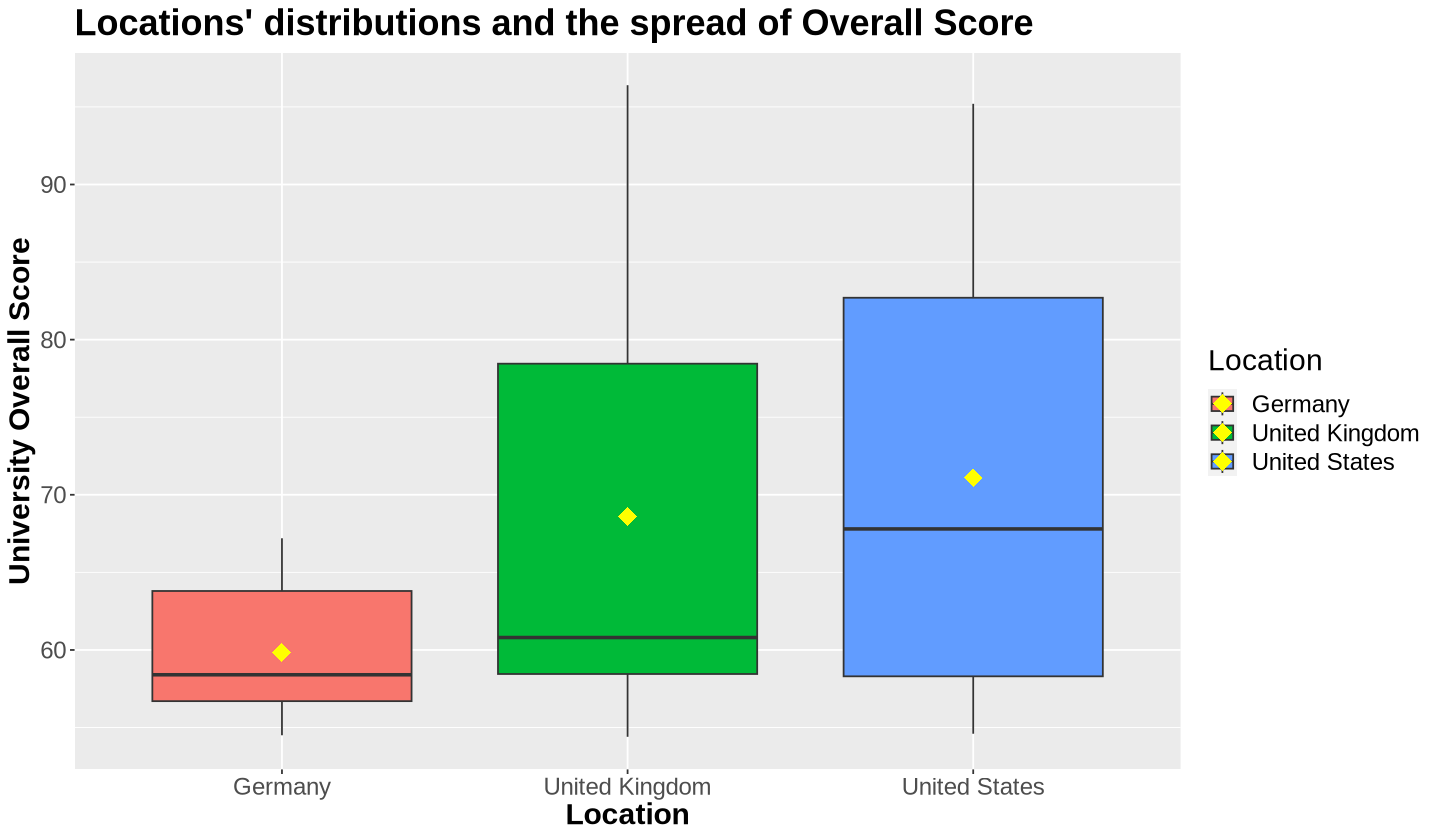

In [7]:
# Main developer: Shanmei Liu
options(repr.plot.width = 12, repr.plot.height = 7) 

(location_overall_boxplot <- 
clean_university |>
ggplot()+
geom_boxplot(aes(x = Location, y = OverAll.Score,fill = Location))+
 ggtitle("Locations' distributions and the spread of Overall Score") +
   xlab("Location") +
   ylab("University Overall Score") +
   stat_summary(aes(x = Location, y = OverAll.Score,fill = Location),
     fun = "mean", colour = "yellow", geom = "point",
     shape = 18, size = 5
   ) +
   theme(
     text = element_text(size = 18),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   )
)

cat("Figure 5: Box Plot for Location and Overall Score")

The box plot (Figure 5) indicates that:
- **Germany**: Scores are concentrated with a median close to 60 and a narrow interquartile range (IQR). The mean score (yellow diamond) is slightly above the median, showing a slight positive skew.
- **United Kingdom**: The UK has a larger IQR than Germany, indicating a wider spread of scores. The median is around 60, and the mean is approximately 70, with a wider spread than Germany but narrower than the US.

- **United States**:  The US shows the widest distribution, with scores spanning from roughly 60 to 90. The median is close to 70, and the mean is slightly above 70, suggesting greater diversity in university performance.

In general, The United States has the highest variability in Overall Scores, indicating a broader range of university performance levels. Additionally, the United Kingdom and Germany have relatively narrower ranges, with the UK showing a slightly larger spread than Germany. Besides, The median scores indicate that on average, universities in the US tend to score higher than those in Germany but are comparable with those in the UK.

To further explore the relationship between `Research Score` and `Overall Score` across different locations, a scatter plot was generated:

Figure 6: The scatter plot between overall score and research score via locations

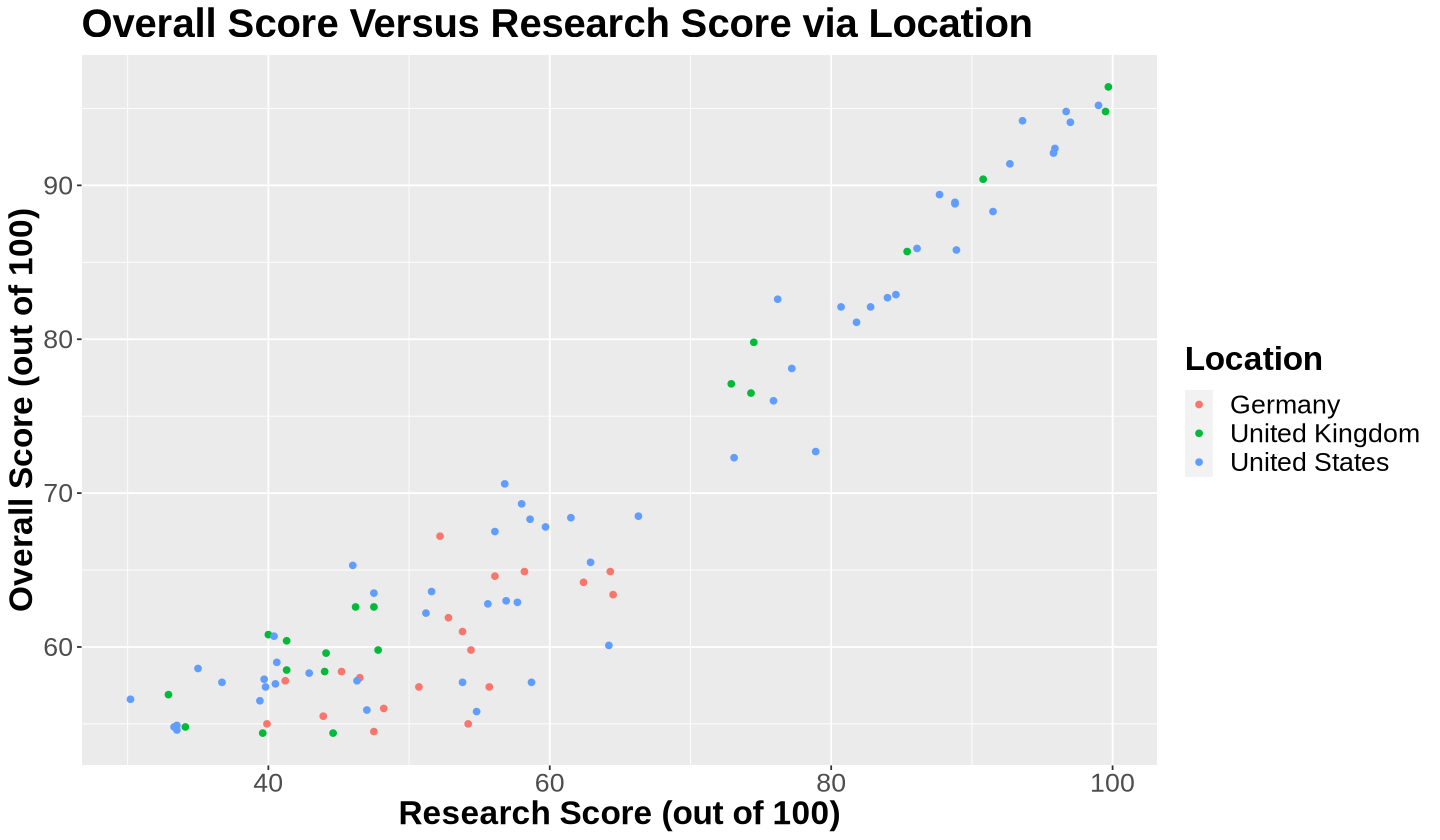

In [9]:
# Main developer: Shanmei Liu
overall_research_plot <- 
     clean_university |>
     ggplot() +
     geom_point(aes(x = Research.Score, y = OverAll.Score, color = Location)) +
   labs(title = "Overall Score Versus Research Score via Location",
        x = "Research Score (out of 100)",
        y = "Overall Score (out of 100)"
   ) +
   theme(
     text = element_text(size = 20),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold"),
     legend.title = element_text(face = "bold"),
   )
cat("Figure 6: The scatter plot between overall score and research score via locations")
overall_research_plot


Figure 6 shows a clear positive correlation between Research Score and Overall Score across all locations. As Research Scores increase, Overall Scores also rise. This suggests that higher research performance generally leads to higher overall rankings. US universities dominate the higher end of the scale, indicating high performance in both scores, while UK and German universities have fewer high Research Scores, correlating with fewer top Overall Scores.


***Potential Problems or Biases***:

**Multicollinearity**: 
One potential issue in multiple linear regression (MLR) analysis is multicollinearity, where high correlation between predictor variables can inflate standard errors and obscure individual variable effects. To assess this, VIF was calculated for the predictors.

In [8]:
# Main developer: Shanmei Liu
car::vif(lm(OverAll.Score ~.,data = clean_university))
cat("Figure 7: VIF for covarites")

,GVIF,Df,GVIF^(1/(2*Df))
Location,1.06202,2,1.015157
Research.Score,1.06202,1,1.030543


Figure 7: VIF for covarites

The VIF values for Location and Research.Score were found to be low, indicating minimal multicollinearity. This suggests that the predictors are not highly correlated, allowing for clear interpretation of their individual effects on the outcome variable.

### b. Methods: Plan

#### Splitting the Training and Testing Dataset

To build and evaluate the predictive model, the dataset was divided into training and testing sets. This separation ensures the model's performance can be assessed on unseen data, providing an unbiased evaluation. 

In [29]:
# Main developer: Jessie Zhao
set.seed(9999)
train_indices <- sample(seq_len(nrow(clean_university)), size = 0.7 * nrow(clean_university))
train_data <- clean_university[train_indices, ]
test_data <- clean_university[-train_indices, ]




head(train_data)
cat("Table 8: Head rows of training data")
head(test_data)
cat("Table 9: Head rows of testing data")

,Location,OverAll.Score,Research.Score
,<chr>,<dbl>,<dbl>
6,United States,94.1,97.0
41,Germany,64.9,64.3
3,United Kingdom,94.8,99.5
74,United States,57.7,53.8
66,Germany,58.4,45.2
8,United States,92.1,95.8


Table 8: Head rows of training data

,Location,OverAll.Score,Research.Score
,<chr>,<dbl>,<dbl>
5,United States,94.2,93.6
12,United States,88.9,88.8
13,United States,88.8,88.8
17,United Kingdom,85.7,85.4
18,United States,82.9,84.6
21,United States,82.1,80.7


Table 9: Head rows of testing data

### Model Selection

To determine the most appropriate model, we compared an additive Multiple Linear Regression (MLR) model and an MLR model with interaction terms using the training dataset. The models were evaluated based on the ANOVA/F statistics, which help identify whether including interaction terms significantly improves the model's explanatory power.

In [22]:
# Main developer: Jessie Zhao
mlr_additive <- lm(OverAll.Score ~ Research.Score + Location, data = train_data)
mlr_interaction <- lm(OverAll.Score ~ Research.Score * Location, data = train_data)

mlr_additive |>
    tidy() |>
    mutate_if(is.numeric, round, 3)
cat("Table 10: Summary of Additive Model")

mlr_interaction |>
    tidy() |> 
    mutate_if(is.numeric, round, 3)
cat("Table 11: Summary of Interaction Model")

anova_result <- anova(mlr_additive, mlr_interaction)
anova_result
cat("Table 12: ANOVA Results for Model Comparison")

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),27.782,1.757,15.814,0.000
Research.Score,0.620,0.025,24.408,0.000
LocationUnited Kingdom,6.635,1.646,4.030,0.000
LocationUnited States,3.633,1.398,2.599,0.015


Table 10: Summary of Additive Model

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),41.215,6.976,5.908,0.000
Research.Score,0.362,0.132,2.746,0.011
LocationUnited Kingdom,-5.994,7.565,-0.792,0.435
LocationUnited States,-11.088,7.288,-1.521,0.140
Research.Score:LocationUnited Kingdom,0.244,0.139,1.754,0.091
Research.Score:LocationUnited States,0.277,0.135,2.045,0.051


Table 11: Summary of Interaction Model

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29,270.0060,NA,NA,NA,NA
2,27,232.8565,2,37.14949,2.153765,0.1355664


Table 12: ANOVA Results for Model Comparison

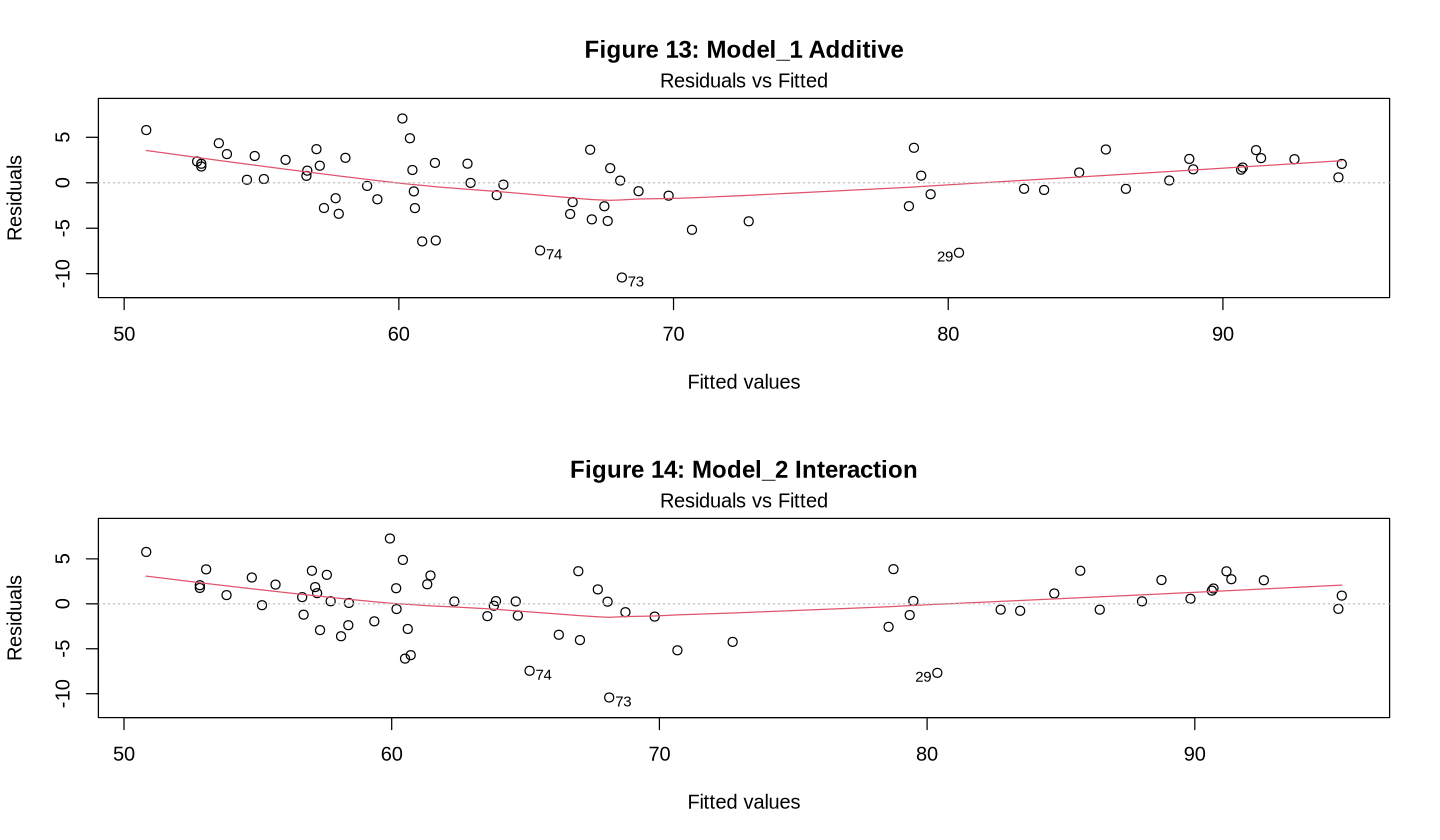

In [11]:
# Main developer: Jessie Zhao
par(mfrow = c(2, 1))
plot(mlr_additive, 1, main = "Figure 13: Model_1 Additive")
plot(mlr_interaction, 1, main = "Figure 14: Model_2 Interaction")

**Selected Model**: Based on the ANOVA results, since p_value is greater than 0.05, we don't have enough evidence to reject the H0. It means the interaction terms did not significantly improve the model, hence the additive model was chosen for further analysis.

### Building the MLR Model and Interpreting Results


The chosen additive MLR model was fitted to the training data. Key metrics, including coefficients, confidence intervals (CI), and p-values, were extracted to interpret the impact of the independent variables on the dependent variable.

In [30]:
# Main developer: Jessie Zhao
mlr_additive <- lm(OverAll.Score ~ Research.Score + Location, data = test_data)

tidy(mlr_additive, conf.int  = T, conf.level=0.95)
cat("Table 11: Coefficient Estimates and Confidence Intervals")

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),26.5837307,2.9792445,8.922977,3.034545e-09,20.4478619,32.7195996
Research.Score,0.6157815,0.0403395,15.264978,3.528910e-14,0.5327008,0.6988623
LocationUnited Kingdom,5.8247820,2.4661720,2.361872,2.628021e-02,0.7456056,10.9039584
LocationUnited States,4.3945336,2.1838805,2.012259,5.508496e-02,-0.1032525,8.8923196


Table 11: Coefficient Estimates and Confidence Intervals

#### Interpretation

From the `Table 11`, coefficient of `Research.Score` = 0.615 indicates that with one point increase in research score, there are expected associated with 0.615 increase in overall Score in average, constant the University Location. `Intercept` shows the average research score in Germany is 26.584. The `LocationUnited Kingdom` means fixed the research score, the average overall score in UK is 5.825 higher than that of Germany. Similarly,`LocationUnited States` for constant research score, the average overall score of universities in US is 4.395 higher than that of Germany. 

Unfortunately, the p-value `LocationUnited States` is 0.0551 which slightly greater than signficant level (0.05). It means that we don't have enough evidence to reject the Null Hypothesis that for constant research score, the universitiy overall score are signficantly different between Germany and United State. Except for that, all other p values are smaller than 0.05, which show there are significantly associate between Reseach Score and Overall Score; And The overall score of universities in UK and Germany are signficantly different.

We are 95% confident that: 1). The average university overall score in Germany is from 20.448 to 32.720. 2). The differnce overall score between UK and Germany is between 0.746 to 10.904. 3). With one point increase in research score, fixed the location, the overall score expected increase between 0.533 to 0.699 point. 

### Assumption check

 Residual plots were generated to assess model assumptions. 

Figure 12: Diagnostic Plots for Multiple Linear Regression Model

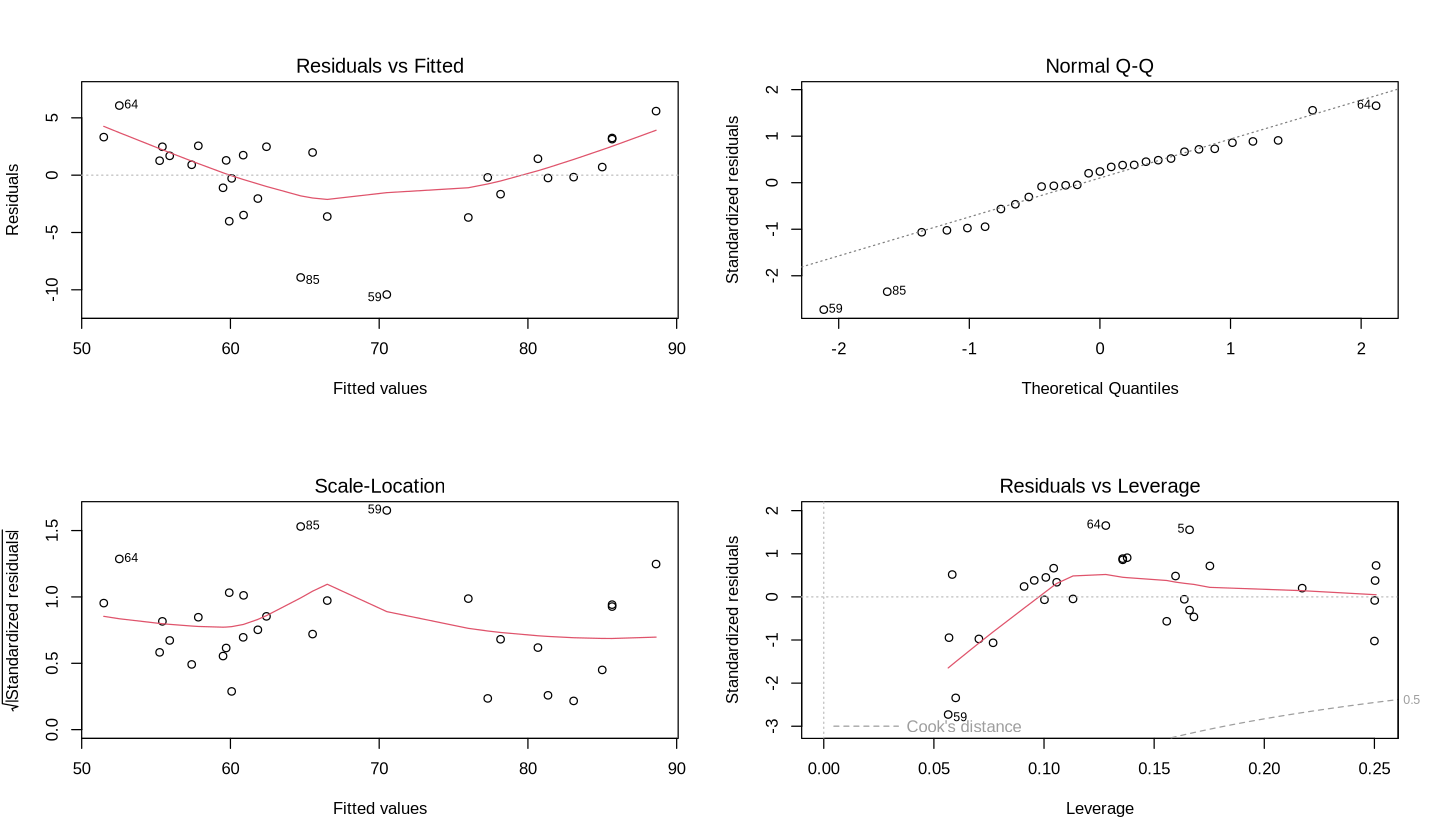

In [36]:
# Main developer: Jessie Zhao
par(mfrow = c(2, 2))
plot(mlr_additive )
cat("Figure 12: Diagnostic Plots for Multiple Linear Regression Model")

The diagnostic plots for the fitted multiple linear regression model illustrates that:

- Linear relation: In this plot, there is a slight curve, suggesting some non-linearity in the model.

- Normality: Q-Q Plot shows that most points lie close to the 45 degree line, with some deviations at the tails, suggesting slight deviations from normality.

- Heteroscedasticity: In the third plot, the slight upward trend indicates increasing variance with fitted values, suggesting some heteroscedasticity.

- Independence: Observations (universities) should be independent of each other which decided by the design of study. From Kaggle we see the datapoint are collected from submitted data which ensures that the observations are not influenced by each other.

### Model Evaluation

In order to assess the model, we use the R square and RMSE_testing, by fitting the model in testing dataset. 

In [38]:
# Main developer: Jessie Zhao
# Contributer: Shanmei Liu

test_predictions <- predict(mlr_additive, newdata = test_data)
RMSE_testing <- sqrt(mean((test_predictions - test_data$OverAll.Score)^2))

glance(mlr_additive)
cat("Table 13: Metrics table for additive model ")
RMSE_testing

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.908067,0.8970351,3.928851,82.31242,4.341819e-13,3,-78.67919,167.3584,174.1949,385.8967,25,29


Table 13: Metrics table for additive model 

[1] 3.647846

- **R-squared**: 0.908, indicating that approximately 90.17% of the variance in the Overall Score is explained by the model.
- **RMSE**: 3.648, Considering the typical range of university scores (e.g., 0-100), an RMSE indicates that the predicted overall score of universities differ from the actual scores by approximately 3.648 point (in the testing data set). 

## **3. Discussion:**

### Findings

 There is a strong positive correlation between Research Score and Overall Score across universities in the United States, Germany, and the United Kingdom. Universities with higher research performance tend to achieve higher overall scores. Furthermore:
- Universities in the United States generally have higher variability and higher overall scores compared to those in Germany and the United Kingdom. 
- The chosen additive MLR model, which includes Research Score and Location as predictors, explains approximately 90.81% of the variance in Overall Score (R-squared = 0.90806).
- The model's Root Mean Square Error (RMSE) is 3.7890, reflecting the predicted overall scores of universities differ from the actual scores by approximately 3.7890 points.

**Implication** : The strong positive correlation between research score and overall score highlights the importance of research output in university rankings. Universities aiming to improve their global standing should focus on increasing research funding, encouraging high-impact publications, and fostering collaborations. Geographical differences in overall scores indicate that regional factors like funding, research infrastructure, and policy environment significantly influence performance. Administrators can use these insights to allocate resources more effectively, invest in research infrastructure, support faculty research, and enhance international collaborations for better performance and rankings.


### Expectation

The results align with expectations, confirming the hypothesis that research output significantly influences university rankings. The geographical differences in scores were also anticipated, given the varying levels of funding, infrastructure, and policy environments in different countries.
But there are not signficantly difference in the overall score for universities in Germany and UK. The difference in sample box plot just due to random. 


### Improvement

One improvement is about **RMSE**. We use the same testing data to fit the selected model, then use this model to compute the RMSE. This will cause the overfitting to some extend, and the RMSE will be underestimate. If we put other new sets of observation, the RMSE should be higher than 3.648. 

Additionally, the distribution of universities across locations differs significantly, with the U.S. having more universities than Germany and the UK. This imbalance likely contributes to the higher standard deviation observed in the UK and Germany. As a result, the model's predictions may be less reliable in these regions, leading to potential biases or less accurate predictions in countries with fewer universities. This disparity emphasizes the need for location-based adjustments or weighting to ensure the model accounts for regional differences adequately.

Furthermore, incorporating more relevant predictors such as faculty-to-student ratio and industry income score might improve our model's explanatory power. Implementing cross-validation techniques will allow us to assess the model's performance, prevent overfitting, and ensure the robustness and generalizability of our findings by validating the model on different subsets of the data.

### Further question

Since we can see that university's research score is positively correlated with overall score. Future questions could be looking into factors that affect the research score of universities. For example, universities with a higher ratio of international students may benefit from diverse perspectives and increased collaboration opportunities, potentially enhancing their research output. After what we discovered about the geographical differences in this study, it may also be beneficial for future studies to investigate the differences in factors affecting research scores across different regions or countries.

## Appendix A

- 1)`University Rank` - the world ranking of the specific university

- 2)`Name of University` - name of the specified university

- 3)`Location` - a place where the university is

- 4)`No of student` - current students enrolled in the university

- 5)`No of student per staff` - number of students under a single professor

- 6)`International Student` - the percentage of enrolled students that are international students

- 7)`Female: Male Ratio` - the ratio of female to male students respectively

- 8)`OverAll Score` - overall score of the university out of 100

- 9)`Teaching Score` - teaching score out of 100

- 10)`Research Score` - research score out of 100

- 11)`Citations Score` - CiteScore is the number of citations received by a journal in one year to documents published in the three previous years, divided by the number of documents indexed in Scopus published in those same three years. It is out of 100.

- 12)`Industry Income Score` - how much money a university receives from the working industry in exchange for its academic expertise. Out of 100

- 13)`International Outlook Score` - the ability of a university to attract undergraduates, postgraduates, and faculty from all over the world

## **4. Reference:**

Taqi, Syed Ali. “World University Rankings 2023.” 2023, Accessed 2024. 

Udupi, Prakash Kumar, et al. “Predicting Global Ranking of Universities across the World Using Machine Learning Regression Technique.” SHS Web of Conferences, EDP Sciences, 13 Jan. 2023, www.shs-conferences.org/articles/shsconf/abs/2023/05/shsconf_ictl2023_04001/shsconf_ictl2023_04001.html. Accessed 03 Aug. 2024. 

Wut, Tai-Ming, et al. “Does University Ranking Matter? Choosing a University in the Digital Era.” MDPI, Multidisciplinary Digital Publishing Institute, 23 Mar. 2022, www.mdpi.com/2227-7102/12/4/229. Accessed 03 Aug. 2024. 